In [1]:
import os 
import pandas as pd

base_dir = r"D:\studia\magisterka\out"
all_data = []

g1_path = os.path.join(base_dir, "G1_larger")
for root, dirs, files in os.walk(g1_path):
    for file_name in files:
        if file_name.endswith(".csv"):
            file_path = os.path.join(root, file_name)
            df = pd.read_csv(file_path)
            df_last = df.tail(1).copy()
            df_last["target"] = "G1"
            all_data.append(df_last)

g2_path = os.path.join(base_dir, "G2_larger")
for root, dirs, files in os.walk(g2_path):
    for file_name in files:
        if file_name.endswith(".csv"):
            file_path = os.path.join(root, file_name)
            df = pd.read_csv(file_path)
            df_last = df.tail(1).copy()
            df_last["target"] = "G2"
            all_data.append(df_last)

g3_path = os.path.join(base_dir, "G3_larger")
for root, dirs, files in os.walk(g3_path):
    for file_name in files:
        if file_name.endswith(".csv"):
            file_path = os.path.join(root, file_name)
            df = pd.read_csv(file_path)
            # Bierzemy tylko ostatni wiersz
            df_last = df.tail(1).copy()
            df_last["target"] = "G3"
            all_data.append(df_last)


data = pd.concat(all_data, ignore_index=True)


print(data.head())
print(data.shape)


# data.to_csv(r"D:\studia\magisterka\out\all_data.csv", index=False)

   mean_intensity  std_intensity  skew_intensity  kurtosis_intensity  \
0       56.122941      15.928951       -1.182401            5.338186   
1       50.749038      10.424170       -0.992506            5.682846   
2       64.121158      15.915347       -2.132723            8.135275   
3       44.550129       5.513379       -0.772402            6.180891   
4       56.682217      12.750582       -0.886532            5.524097   

   entropy_hist  bounding_box_width  bounding_box_height         area  \
0      1.684023           40.920635            38.857143  1034.095238   
1      1.167562           49.109890            50.032967  1702.318681   
2      1.510994           35.209677            31.661290   759.225806   
3      0.839720           49.084507            48.211268  1582.309859   
4      1.544012           44.850746            44.208955  1378.253731   

    perimeter  eccentricity  ...  max_GLCM_energy  cv_GLCM_correlation  \
0  133.851149      0.713602  ...         0.999999     

In [2]:
import numpy as np
import pandas as pd

# Załóżmy, że:
# 1) 'data' to Twój DataFrame (153 wiersze x 261 kolumn).
# 2) Kolumna z etykietami klas nazywa się np. 'target'.
# 3) Klasa, którą chcesz "powiększyć", to 'G1'.

# Wyodrębnij wiersze dla klasy G1
df_g1 = data[data["target"] == "G1"].copy()

# Ile przykładów mamy obecnie, a ile chcemy mieć
current_size = len(df_g1)         # np. 22
target_size = 53                 # Twój docelowy rozmiar

if current_size < target_size:
    n_needed = target_size - current_size
    
    # Oddziel cechy numeryczne (bez kolumny "target")
    df_g1_features = df_g1.drop(columns=["target"])
    
    # Oblicz średnie i odchylenia std w każdej kolumnie
    means = df_g1_features.mean()
    stds = df_g1_features.std()
    
    # Zainicjuj macierz do przechowania nowych wylosowanych próbek
    new_data = np.zeros((n_needed, df_g1_features.shape[1]))
    
    # Dla każdej kolumny w df_g1_features generujemy n_needed wartości
    for i, col in enumerate(df_g1_features.columns):
        mu = means[col]
        sigma = stds[col] if stds[col] != 0 else 1e-9  # zabezpieczenie przed std=0
        new_data[:, i] = np.random.normal(mu, sigma, n_needed)
    
    # Tworzymy DataFrame z wylosowanych próbek i dodajemy etykietę klasy G1
    df_new_g1 = pd.DataFrame(new_data, columns=df_g1_features.columns)
    df_new_g1["target"] = "G1"
    
    # Doklejamy nowe próbki do oryginalnego zbioru
    data = pd.concat([data, df_new_g1], ignore_index=True)
    
    print(f"Dodano {n_needed} nowych wierszy do klasy G1.")
    print("Aktualny rozkład klas:\n", data["target"].value_counts())
else:
    print("Klasa G1 ma już wystarczającą liczbę próbek.")

print(data.shape)

Dodano 32 nowych wierszy do klasy G1.
Aktualny rozkład klas:
 target
G3    75
G2    57
G1    53
Name: count, dtype: int64
(185, 261)


### I sposob imputacji

Feature ranking (top 20):
1. GLCM_homogeneity (0.0498)
2. GLCM_energy (0.0420)
3. cv_GLCM_homogeneity (0.0400)
4. min_GLCM_homogeneity (0.0379)
5. max_GLCM_contrast (0.0369)
6. std_GLCM_energy (0.0309)
7. std_GLCM_homogeneity (0.0273)
8. std_GLCM_contrast (0.0244)
9. GLCM_contrast (0.0239)
10. min_GLCM_energy (0.0197)

Cross-validation results (averages) for different feature counts:
    num_features  cv_accuracy  cv_f1_macro    cv_mcc
0              5     0.824598     0.829136  0.736905
1             10     0.844598     0.848806  0.770761
2             20     0.898851     0.901698  0.851102
3             25     0.899080     0.903585  0.851049
4             30     0.898621     0.902643  0.850860
5             40     0.905287     0.910104  0.858871
6             45     0.878391     0.883285  0.817762
7             50     0.898851     0.903548  0.848807
8             60     0.905747     0.910908  0.859167
9             70     0.885517     0.889628  0.828211
10            80     0.892414 

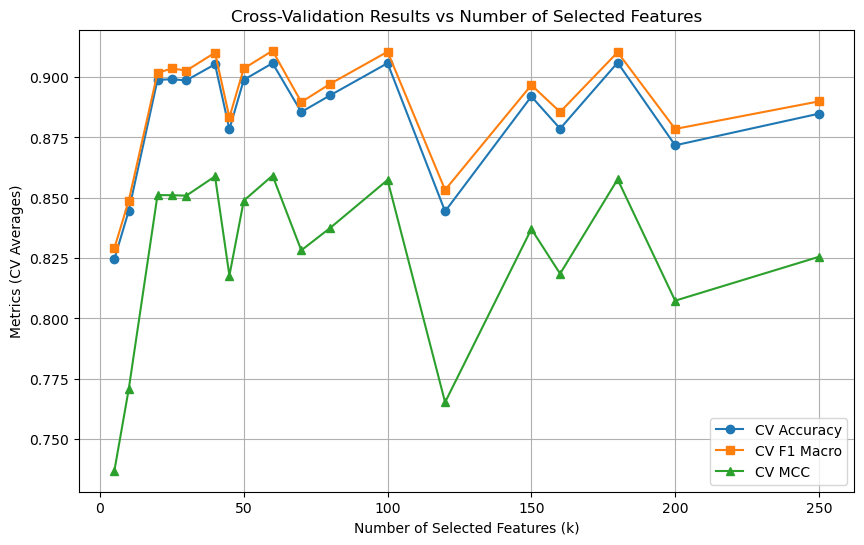


Cross-validation results saved to 'cross_validation_feature_ranking_results.csv'.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, make_scorer

# ========= 1) Data Preparation =========
# Assume 'data' is a DataFrame with no missing values and 'target' is the target label column
X = data.drop(columns=["target"])
y = data["target"]

# Split data into training and testing sets (e.g., 80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ========= 2) Feature Ranking on Full Dataset =========
base_model = RandomForestClassifier(n_estimators=100, random_state=42)
base_model.fit(X_train, y_train)

importances = base_model.feature_importances_
feature_names = X_train.columns

# Sort features by importance in descending order
indices = np.argsort(importances)[::-1]
sorted_features = feature_names[indices]
sorted_importances = importances[indices]

print("Feature ranking (top 20):")
for i in range(min(10, len(sorted_features))):
    print(f"{i+1}. {sorted_features[i]} ({sorted_importances[i]:.4f})")

# ========= 3) Cross-Validation for Different Feature Counts =========
# Define different feature counts to test
feature_counts = [5, 10, 20, 25, 30, 40, 45, 50, 60, 70, 80, 100, 120, 150, 160, 180, 200, 250]

# Set up cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scorers for cross-validation
mcc_scorer = make_scorer(matthews_corrcoef)
scoring = {
    'accuracy': 'accuracy',
    'f1_macro': 'f1_macro',
    'mcc': mcc_scorer
}

results = []

for k in feature_counts:
    top_k_features = sorted_features[:k]

    # Create a subset with top-k features
    X_train_k = X_train[top_k_features]

    # Define the model
    model_k = RandomForestClassifier(n_estimators=100, random_state=42)

    # Perform cross-validation
    cv_scores = cross_validate(
        model_k, X_train_k, y_train,
        cv=cv, scoring=scoring, n_jobs=-1
    )

    acc_mean = np.mean(cv_scores['test_accuracy'])
    f1_mean = np.mean(cv_scores['test_f1_macro'])
    mcc_mean = np.mean(cv_scores['test_mcc'])

    results.append({
        'num_features': k,
        'cv_accuracy': acc_mean,
        'cv_f1_macro': f1_mean,
        'cv_mcc': mcc_mean
    })

results_df = pd.DataFrame(results)
print("\nCross-validation results (averages) for different feature counts:")
print(results_df)

# ========= 4) Selecting the Best k =========
# Example: Select k based on the highest F1-macro score in cross-validation
best_k = results_df.loc[results_df['cv_f1_macro'].idxmax(), 'num_features']
print(f"\nBest k (based on F1-macro in CV): {best_k}")

# ========= 5) Train Final Model and Test ============
# Create final subset of features (top-best_k) on the full training set
final_features = sorted_features[:best_k]
X_train_final = X_train[final_features]
X_test_final = X_test[final_features]

final_model = RandomForestClassifier(n_estimators=100, random_state=42)
final_model.fit(X_train_final, y_train)

y_pred_test = final_model.predict(X_test_final)

test_acc = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test, average='macro')
test_mcc = matthews_corrcoef(y_test, y_pred_test)

print(f"\n=== Test Set Results for k={best_k} Features ===")
print(f"Accuracy:  {test_acc:.3f}")
print(f"F1-macro:  {test_f1:.3f}")
print(f"MCC:       {test_mcc:.3f}")

# ========= 6) Cross-Validation Plot (Accuracy, F1, MCC vs k) ============
plt.figure(figsize=(10, 6))
plt.plot(results_df['num_features'], results_df['cv_accuracy'], marker='o', label='CV Accuracy')
plt.plot(results_df['num_features'], results_df['cv_f1_macro'], marker='s', label='CV F1 Macro')
plt.plot(results_df['num_features'], results_df['cv_mcc'], marker='^', label='CV MCC')
plt.xlabel('Number of Selected Features (k)')
plt.ylabel('Metrics (CV Averages)')
plt.title('Cross-Validation Results vs Number of Selected Features')
plt.grid(True)
plt.legend()
plt.show()

# ========= 7) Save Cross-Validation Results to CSV ==========
results_df.to_csv("cross_validation_feature_ranking_results.csv", index=False)
print("\nCross-validation results saved to 'cross_validation_feature_ranking_results.csv'.")



=== RANKING: Filter_MI ===
     ranking  num_features  cv_accuracy  cv_f1_macro    cv_mcc
0  Filter_MI             5     0.776322     0.771907  0.667503
1  Filter_MI            10     0.756322     0.753923  0.642780
2  Filter_MI            20     0.823908     0.836098  0.759314
3  Filter_MI            30     0.823448     0.833978  0.738631
4  Filter_MI            40     0.850805     0.858531  0.780394
5  Filter_MI            50     0.810345     0.815863  0.715443
6  Filter_MI            60     0.837701     0.840354  0.757920
7  Filter_MI            80     0.796552     0.798513  0.695858
8  Filter_MI           100     0.770115     0.770251  0.655038
Best k for Filter_MI: 40
[Filter_MI] Test results for k=40 => ACC=0.757, F1=0.766, MCC=0.630

=== RANKING: SVC_coef ===
    ranking  num_features  cv_accuracy  cv_f1_macro    cv_mcc
0  SVC_coef             5     0.702759     0.694360  0.556528
1  SVC_coef            10     0.701609     0.694398  0.550656
2  SVC_coef            20     0.8245

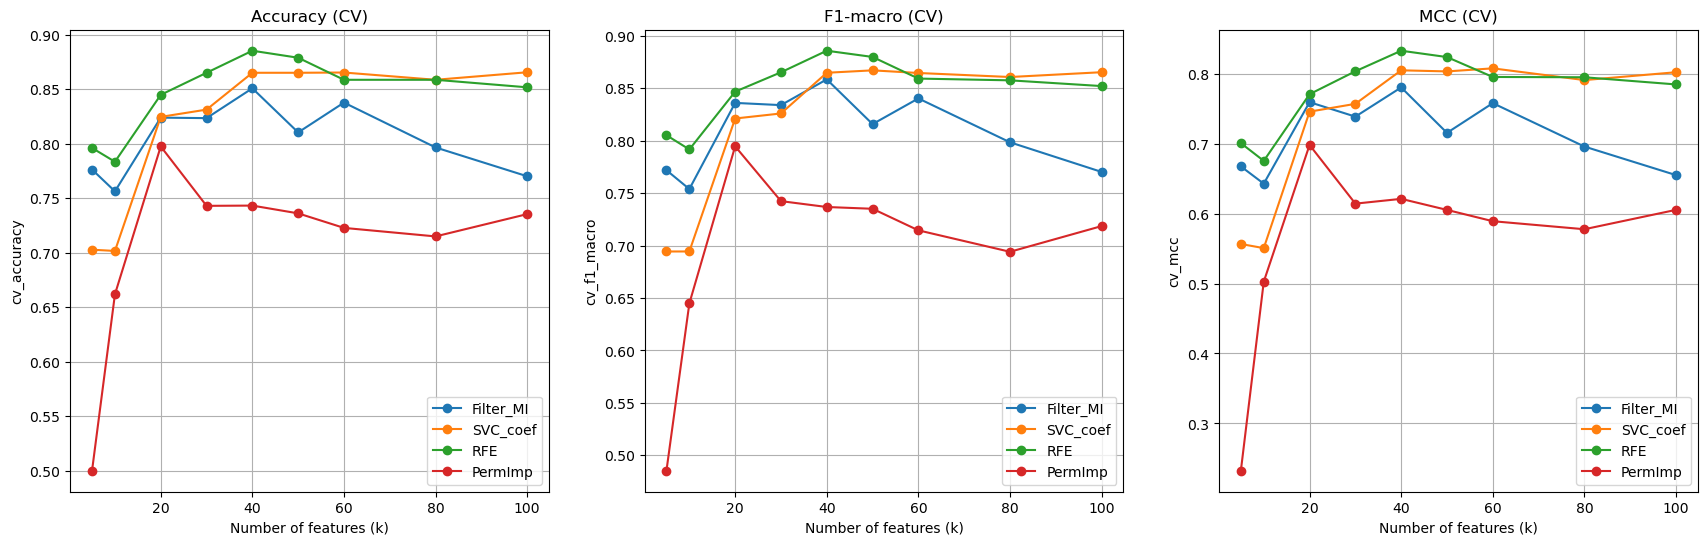


=== Best (without tuning) summary ===
   num_features  cv_accuracy  cv_f1_macro    cv_mcc  best_k  test_acc  \
0            40     0.850805     0.858531  0.780394      40  0.756757   
1            20     0.797471     0.794658  0.698129      20  0.756757   
2            40     0.885287     0.885861  0.832874      40  0.783784   
3            50     0.865057     0.867141  0.803297      50  0.729730   

   test_f1_macro  test_mcc  
0       0.766141  0.629887  
1       0.746998  0.631521  
2       0.787646  0.671136  
3       0.738889  0.592433  

>>> Tuning hyperparams for ranking=Filter_MI, k=40


C:\Users\micha\AppData\Local\Temp\ipykernel_37880\2462096861.py:177: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  summary_df = all_results_df.groupby("ranking", as_index=False).apply(


Best params for Filter_MI: {'svc__C': 10, 'svc__gamma': 0.01}
Best CV score (f1_macro) for Filter_MI: 0.8873
Test => ACC=0.757, F1=0.760, MCC=0.630

>>> Tuning hyperparams for ranking=SVC_coef, k=50
Best params for SVC_coef: {'svc__C': 100, 'svc__gamma': 0.001}
Best CV score (f1_macro) for SVC_coef: 0.8859
Test => ACC=0.622, F1=0.637, MCC=0.440

>>> Tuning hyperparams for ranking=RFE, k=40
Best params for RFE: {'svc__C': 100, 'svc__gamma': 0.001}
Best CV score (f1_macro) for RFE: 0.9252
Test => ACC=0.676, F1=0.694, MCC=0.514

>>> Tuning hyperparams for ranking=PermImp, k=20
Best params for PermImp: {'svc__C': 10, 'svc__gamma': 0.01}
Best CV score (f1_macro) for PermImp: 0.7706
Test => ACC=0.757, F1=0.755, MCC=0.636

=== Tuned results for each ranking ===
     ranking  best_k                           best_params  cv_f1_macro_tuned  \
0  Filter_MI      40    {'svc__C': 10, 'svc__gamma': 0.01}           0.887280   
1   SVC_coef      50  {'svc__C': 100, 'svc__gamma': 0.001}           0.88

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, make_scorer
from sklearn.feature_selection import mutual_info_classif, RFE
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# ================== 1) Data Loading & Split ==================
X = data.drop(columns=["target"])
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ================== 2) Funkcje do wyznaczania rankingów ==================

def get_ranking_filter_mi(X_tr, y_tr):
    """Zwraca listę cech posortowanych wg mutual_info_classif (descending)."""
    mi_values = mutual_info_classif(X_tr, y_tr, discrete_features=False, random_state=42)
    mi_indices = np.argsort(mi_values)[::-1]
    return X_tr.columns[mi_indices]

def get_ranking_svc_coef(X_tr, y_tr):
    """Zwraca listę cech posortowanych wg |coef_| SVC (kernel='linear'), ze standaryzacją."""
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("svc", SVC(kernel='linear', max_iter=20000, random_state=42))
    ])
    pipe.fit(X_tr, y_tr)
    svc_linear = pipe.named_steps["svc"]
    importances = np.abs(svc_linear.coef_).mean(axis=0)  # jeśli wieloklasy: średnia
    indices = np.argsort(importances)[::-1]
    return X_tr.columns[indices]

def get_ranking_rfe(X_tr, y_tr):
    """Zwraca listę cech wg RFE na SVC (kernel='linear'), ze standaryzacją."""
    scaler = StandardScaler()
    X_tr_scaled = scaler.fit_transform(X_tr)
    svc_lin = SVC(kernel='linear', max_iter=20000, random_state=42)
    rfe = RFE(estimator=svc_lin, n_features_to_select=1, step=1)
    rfe.fit(X_tr_scaled, y_tr)
    indices = np.argsort(rfe.ranking_)
    return X_tr.columns[indices]

def get_ranking_permutation(X_tr, y_tr):
    """Zwraca listę cech wg spadku accuracy przy permutacji (SVC RBF)."""
    pipe = Pipeline([
        ("scaler", StandardScaler()),
        ("svc", SVC(kernel='rbf', random_state=42))
    ])
    pipe.fit(X_tr, y_tr)
    X_tr_scaled = pipe.named_steps["scaler"].transform(X_tr)
    svc_rbf = pipe.named_steps["svc"]
    perm = permutation_importance(svc_rbf, X_tr_scaled, y_tr, scoring="accuracy",
                                  n_repeats=5, random_state=42)
    importances = perm.importances_mean
    indices = np.argsort(importances)[::-1]
    return X_tr.columns[indices]

# ================== 3) Wyznaczamy rankingi ==================
mi_sorted   = get_ranking_filter_mi(X_train, y_train)
svc_sorted  = get_ranking_svc_coef(X_train, y_train)
rfe_sorted  = get_ranking_rfe(X_train, y_train)
perm_sorted = get_ranking_permutation(X_train, y_train)

ranking_dict = {
    "Filter_MI": mi_sorted,
    "SVC_coef" : svc_sorted,
    "RFE"      : rfe_sorted,
    "PermImp"  : perm_sorted
}

# ================== 4) Cross-Validate dla różnych rankingów i k ==================
feature_counts = [5, 10, 20, 30, 40, 50, 60, 80, 100]

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
mcc_scorer = make_scorer(matthews_corrcoef)
scoring = {"accuracy":"accuracy", "f1_macro":"f1_macro", "mcc":mcc_scorer}

all_results = []

for rank_name, sorted_feats in ranking_dict.items():
    print(f"\n=== RANKING: {rank_name} ===")
    results = []
    
    for k in feature_counts:
        top_k = sorted_feats[:k]
        
        # Pipeline: standaryzacja + SVC(RBF)
        model_k = Pipeline([
            ("scaler", StandardScaler()),
            ("svc", SVC(kernel='rbf', random_state=42))
        ])
        
        # Cross-validation
        cv_scores = cross_validate(
            model_k, X_train[top_k], y_train,
            cv=cv, scoring=scoring, n_jobs=-1
        )
        
        acc_mean = np.mean(cv_scores["test_accuracy"])
        f1_mean  = np.mean(cv_scores["test_f1_macro"])
        mcc_mean = np.mean(cv_scores["test_mcc"])
        
        results.append({
            "ranking": rank_name,
            "num_features": k,
            "cv_accuracy": acc_mean,
            "cv_f1_macro": f1_mean,
            "cv_mcc": mcc_mean
        })
    
    df_r = pd.DataFrame(results)
    print(df_r)
    
    # Szukamy best_k wg f1_macro
    best_idx = df_r["cv_f1_macro"].idxmax()
    best_k = df_r.loc[best_idx, "num_features"]
    print(f"Best k for {rank_name}: {best_k}")
    
    # Trenujemy finalny model (bez tuningu) na best_k
    final_feats = sorted_feats[:best_k]
    final_model = Pipeline([
        ("scaler", StandardScaler()),
        ("svc", SVC(kernel='rbf', random_state=42))
    ])
    final_model.fit(X_train[final_feats], y_train)
    
    # Test
    y_pred_test = final_model.predict(X_test[final_feats])
    test_acc = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test, average="macro")
    test_mcc = matthews_corrcoef(y_test, y_pred_test)
    print(f"[{rank_name}] Test results for k={best_k} => "
          f"ACC={test_acc:.3f}, F1={test_f1:.3f}, MCC={test_mcc:.3f}")
    
    # Zbieramy do all_results
    for row in results:
        row["best_k"] = best_k
        row["test_acc"] = test_acc
        row["test_f1_macro"] = test_f1
        row["test_mcc"] = test_mcc
    all_results.extend(results)

# Konwertujemy do DataFrame
all_results_df = pd.DataFrame(all_results)

# ================== 5) Wykres: metryki vs #cech dla każdej metody rankingu ==================

# Rysujemy 3 podwykresy: accuracy, f1_macro, mcc
fig, axes = plt.subplots(1, 3, figsize=(21, 6), sharex=True)

metrics = ["cv_accuracy", "cv_f1_macro", "cv_mcc"]
titles  = ["Accuracy (CV)", "F1-macro (CV)", "MCC (CV)"]

for ax, metric, title in zip(axes, metrics, titles):
    for rank_name in ranking_dict.keys():
        df_temp = all_results_df[all_results_df["ranking"] == rank_name]
        ax.plot(df_temp["num_features"], df_temp[metric], marker='o', label=rank_name)
    ax.set_xlabel("Number of features (k)")
    ax.set_ylabel(metric)
    ax.set_title(title)
    ax.grid(True)
    ax.legend()

plt.show()


# ================== 6) Najlepsze wyniki (bez tuningu) dla każdej metody rankingu ==================
print("\n=== Best (without tuning) summary ===")
summary_df = all_results_df.groupby("ranking", as_index=False).apply(
    lambda g: g.loc[g["cv_f1_macro"].idxmax()]
)
summary_df = summary_df.drop(columns=["ranking"]).rename(columns={"ranking":"_ranking"})  # porządki
print(summary_df)

# ================== 7) STROJENIE HIPERPARAMETRÓW (dla każdego rankingu, w best_k) ==================
# Dla każdej metody rankingu: weź best_k i zrób GridSearchCV
param_grid = {
    "svc__C":     [0.01, 0.1, 1, 10, 100],
    "svc__gamma": ["scale", 0.001, 0.01, 0.1, 1]
}
tuned_results = []

for rank_name in ranking_dict.keys():
    # Znajdź k z poprzedniego kroku
    mask_best = (all_results_df["ranking"] == rank_name)
    df_best_ranking = all_results_df[mask_best]
    best_idx = df_best_ranking["cv_f1_macro"].idxmax()
    best_k = df_best_ranking.loc[best_idx, "num_features"]
    
    # Wyznacz cechy
    sorted_feats = ranking_dict[rank_name]
    final_feats = sorted_feats[:best_k]
    
    print(f"\n>>> Tuning hyperparams for ranking={rank_name}, k={best_k}")
    pipeline = Pipeline([
        ("scaler", StandardScaler()),
        ("svc", SVC(kernel='rbf', random_state=42))
    ])
    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=5,
        scoring="f1_macro",
        n_jobs=-1
    )
    grid.fit(X_train[final_feats], y_train)
    
    print(f"Best params for {rank_name}: {grid.best_params_}")
    print(f"Best CV score (f1_macro) for {rank_name}: {grid.best_score_:.4f}")
    
    # Test final model
    best_model = grid.best_estimator_
    y_pred_test = best_model.predict(X_test[final_feats])
    test_acc = accuracy_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test, average="macro")
    test_mcc = matthews_corrcoef(y_test, y_pred_test)
    print(f"Test => ACC={test_acc:.3f}, F1={test_f1:.3f}, MCC={test_mcc:.3f}")
    
    tuned_results.append({
        "ranking": rank_name,
        "best_k": best_k,
        "best_params": grid.best_params_,
        "cv_f1_macro_tuned": grid.best_score_,
        "test_acc_tuned": test_acc,
        "test_f1_macro_tuned": test_f1,
        "test_mcc_tuned": test_mcc
    })

tuned_df = pd.DataFrame(tuned_results)
print("\n=== Tuned results for each ranking ===")
print(tuned_df)

# Zapisujemy
all_results_df.to_csv("all_rankings_results.csv", index=False)
tuned_df.to_csv("tuned_results.csv", index=False)
print("\nAll results saved to 'all_rankings_results.csv' and 'tuned_results.csv'!")


Po PCA liczba składowych = 25


  0%|          | 0/148 [00:00<?, ?it/s]

mean_abs_shaps.shape = (148, 25, 3)
importances.shape = (25,)

=== Ranking PCA components by SHAP ===
1. PC1 => mean|SHAP|=1.3004
2. PC2 => mean|SHAP|=0.4926
3. PC4 => mean|SHAP|=0.3080
4. PC3 => mean|SHAP|=0.2004
5. PC6 => mean|SHAP|=0.1965
6. PC5 => mean|SHAP|=0.1897
7. PC8 => mean|SHAP|=0.0720
8. PC9 => mean|SHAP|=0.0467
9. PC7 => mean|SHAP|=0.0352
10. PC15 => mean|SHAP|=0.0279
11. PC14 => mean|SHAP|=0.0260
12. PC22 => mean|SHAP|=0.0218
13. PC10 => mean|SHAP|=0.0188
14. PC21 => mean|SHAP|=0.0185
15. PC11 => mean|SHAP|=0.0178
16. PC25 => mean|SHAP|=0.0177
17. PC23 => mean|SHAP|=0.0148
18. PC12 => mean|SHAP|=0.0137
19. PC17 => mean|SHAP|=0.0121
20. PC13 => mean|SHAP|=0.0112
21. PC20 => mean|SHAP|=0.0097
22. PC19 => mean|SHAP|=0.0095
23. PC18 => mean|SHAP|=0.0087
24. PC24 => mean|SHAP|=0.0071
25. PC16 => mean|SHAP|=0.0052

CV results (pipeline with PCA(80% var) + SVC(RBF)):
Accuracy=0.783, F1_macro=0.771, MCC=0.686

=== Final test results (no tuning) ===
Accuracy=0.838
F1-macro=0.834
M

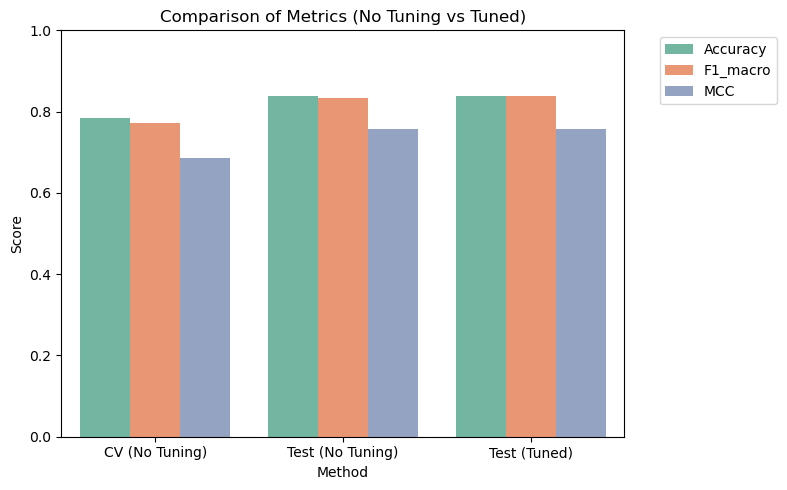

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, cross_validate, GridSearchCV
)
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

import shap

# ========== 1) Przygotowanie danych ==========
X = data.drop(columns=["target"])
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# ========== 2) Pipeline PCA + SVC (probability=True do SHAP) ==========
pca_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.80)),  # np. 80% wyjaśnianej wariancji
    ("svc", SVC(kernel='rbf', probability=True, random_state=42))
])

# Trenujemy pipeline
pca_pipeline.fit(X_train, y_train)

scaler_ = pca_pipeline.named_steps["scaler"]
pca_    = pca_pipeline.named_steps["pca"]
svc_    = pca_pipeline.named_steps["svc"]

print("Po PCA liczba składowych =", pca_.n_components_)

# ========== 3) SHAP w przestrzeni PCA ==========
def custom_predict_proba_pca_only(X_):
    """Zakładamy, że X_ jest już w przestrzeni PCA. Tylko SVC(prob=True).predict_proba(X_)."""
    return svc_.predict_proba(X_)

n_bg = min(100, len(X_train))
n_subset = min(200, len(X_train))

X_bg = X_train.sample(n_bg, random_state=42)
X_sub= X_train.sample(n_subset, random_state=123)

# Ręcznie skalujemy i PCA
X_bg_pca = pca_.transform(scaler_.transform(X_bg))
X_sub_pca= pca_.transform(scaler_.transform(X_sub))

explainer = shap.KernelExplainer(
    model=custom_predict_proba_pca_only,
    data=X_bg_pca,
    link="logit"
)

shap_values = explainer.shap_values(
    X_sub_pca,
    nsamples=100,
    l1_reg="num_features(10)"
)

# Obsługa multi-class
if isinstance(shap_values, list) and len(shap_values) > 1:
    # lista [array_klasa1, ..., array_klasaN] => (n_samples, m)
    abs_shaps = [np.abs(sv) for sv in shap_values]
    mean_abs_shaps = np.mean(abs_shaps, axis=0)   # => (n_samples, m)
else:
    if isinstance(shap_values, list):
        mean_abs_shaps = np.abs(shap_values[0])   # (n_samples, m)
    else:
        mean_abs_shaps = np.abs(shap_values)      # (n_samples, m)

print("mean_abs_shaps.shape =", mean_abs_shaps.shape)
if mean_abs_shaps.ndim == 3:
    # (n_samples, m, n_classes)
    importances = mean_abs_shaps.mean(axis=(0,2)) # => (m,)
else:
    importances = mean_abs_shaps.mean(axis=0)     # => (m,)

print("importances.shape =", importances.shape)  # (m,)
indices = np.argsort(importances)[::-1]

m = pca_.n_components_
pc_names = [f"PC{i+1}" for i in range(m)]
shap_sorted_components = [pc_names[i] for i in indices]
shap_sorted_importances = importances[indices]

print("\n=== Ranking PCA components by SHAP ===")
for i, comp in enumerate(shap_sorted_components):
    print(f"{i+1}. {comp} => mean|SHAP|={shap_sorted_importances[i]:.4f}")

# ========== 4) Cross-validation pipeline ==========
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
mcc_scorer = make_scorer(matthews_corrcoef)
scoring = {"accuracy":"accuracy", "f1_macro":"f1_macro", "mcc":mcc_scorer}

cv_scores = cross_validate(
    pca_pipeline, X_train, y_train,
    cv=cv, scoring=scoring, n_jobs=-1
)

acc_mean = np.mean(cv_scores["test_accuracy"])
f1_mean  = np.mean(cv_scores["test_f1_macro"])
mcc_mean = np.mean(cv_scores["test_mcc"])

print(f"\nCV results (pipeline with PCA(80% var) + SVC(RBF)):")
print(f"Accuracy={acc_mean:.3f}, F1_macro={f1_mean:.3f}, MCC={mcc_mean:.3f}")

# ========== 5) Ocena finalna na zbiorze testowym ==========
y_pred_test = pca_pipeline.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test, average="macro")
test_mcc = matthews_corrcoef(y_test, y_pred_test)

print("\n=== Final test results (no tuning) ===")
print(f"Accuracy={test_acc:.3f}")
print(f"F1-macro={test_f1:.3f}")
print(f"MCC={test_mcc:.3f}")

# ========== 6) Strojenie hiperparametrów ==========
param_grid = {
    "svc__C":     [0.01, 0.1, 1, 10, 100],
    "svc__gamma": ["scale", 0.001, 0.01, 0.1, 1]
}
grid = GridSearchCV(
    estimator=pca_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)
grid.fit(X_train, y_train)

print("\n=== Tuning results ===")
print("Best params:", grid.best_params_)
print(f"Best CV F1-macro={grid.best_score_:.3f}")

best_model = grid.best_estimator_
y_pred_test_tuned = best_model.predict(X_test)

test_acc_tuned = accuracy_score(y_test, y_pred_test_tuned)
test_f1_tuned  = f1_score(y_test, y_pred_test_tuned, average="macro")
test_mcc_tuned = matthews_corrcoef(y_test, y_pred_test_tuned)

print("\n=== Final test with tuned hyperparams (PCA + SVC) ===")
print(f"Accuracy={test_acc_tuned:.3f}")
print(f"F1-macro={test_f1_tuned:.3f}")
print(f"MCC={test_mcc_tuned:.3f}")

# ========== 7) Zapis i wykres metryk ==========

# Tworzymy DataFrame z wynikami
metrics_df = pd.DataFrame({
    "Method": ["CV (No Tuning)", "Test (No Tuning)", "Test (Tuned)"],
    "Accuracy": [acc_mean, test_acc, test_acc_tuned],
    "F1_macro": [f1_mean, test_f1, test_f1_tuned],
    "MCC": [mcc_mean, test_mcc, test_mcc_tuned]
})

print("\n=== Summary of Metrics ===")
print(metrics_df)

# Przekształcenie do formatu long
df_plot = metrics_df.melt(id_vars="Method", var_name="Metric", value_name="Score")

# Wykres słupkowy
plt.figure(figsize=(8, 5))
sns.barplot(data=df_plot, x="Method", y="Score", hue="Metric", palette="Set2")
plt.ylim(0, 1)  # wartości w skali 0..1
plt.title("Comparison of Metrics (No Tuning vs Tuned)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



=== CV results (SVC) ===
Accuracy=0.797, F1_macro=0.789, MCC=0.705

=== Final test results (no tuning) ===
Accuracy=0.784
F1-macro=0.788
MCC=0.671

=== Tuning results ===
Best params: {'svc__C': 10, 'svc__gamma': 'scale'}
Best CV F1-macro=0.810

=== Final test with tuned hyperparams (SVC) ===
Accuracy=0.784
F1-macro=0.788
MCC=0.674


d:\conda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
d:\conda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
d:\conda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
d:\conda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
d:\conda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
d:\conda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
d:\conda\Lib\sit


=== Global LIME Ranking (avg abs weight) ===
1. min_zernike_20 > 0.00 => 0.0307
2. GLCM_contrast > 10.94 => 0.0301
3. cv_zernike_1 > 0.90 => 0.0298
4. max_GLCM_contrast > 18.41 => 0.0285
5. std_GLCM_contrast > 3.51 => 0.0273
6. cv_kurtosis_intensity <= 0.75 => 0.0272
7. max_GLCM_correlation <= 0.86 => 0.0267
8. cv_zernike_1 <= 0.76 => 0.0250
9. zernike_18 > 0.02 => 0.0245
10. min_zernike_7 > 0.00 => 0.0236
11. min_zernike_6 > 0.00 => 0.0226
12. zernike_18 <= 0.02 => 0.0225
13. mean_intensity > 103.59 => 0.0218
14. std_zernike_10 <= 0.02 => 0.0206
15. min_std_intensity > 16.92 => 0.0197

=== Summary of Metrics ===
             Method  Accuracy  F1_macro       MCC
0    CV (No Tuning)  0.797241  0.788862  0.705103
1  Test (No Tuning)  0.783784  0.787646  0.671136
2      Test (Tuned)  0.783784  0.787788  0.674037


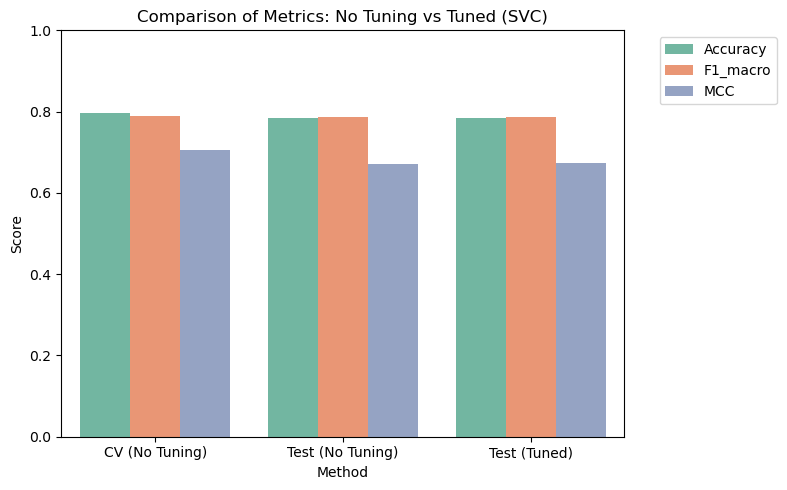

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Podstawowe z sklearn
from sklearn.svm import SVC
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, cross_validate, GridSearchCV
)
from sklearn.metrics import accuracy_score, f1_score, matthews_corrcoef, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# LIME
# jeśli nie masz zainstalowane; w notebooku można
import lime
from lime.lime_tabular import LimeTabularExplainer

# ========== 1) Wczytanie i podział danych ==========
# Zakładamy, że masz wczytaną ramkę 'data' z kolumną "target"

X = data.drop(columns=["target"])
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

# ========== 2) Pipeline: Standaryzacja + SVC(probability=True) ==========

svc_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel='rbf', probability=True, random_state=42))
])

# Dopasowujemy pipeline na zbiorze treningowym
svc_pipeline.fit(X_train, y_train)

# ========== 3) Cross-validation bez strojenia ==========

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
mcc_scorer = make_scorer(matthews_corrcoef)
scoring = {"accuracy": "accuracy", "f1_macro": "f1_macro", "mcc": mcc_scorer}

cv_scores = cross_validate(
    svc_pipeline, X_train, y_train, 
    cv=cv, scoring=scoring, n_jobs=-1
)

acc_mean = np.mean(cv_scores["test_accuracy"])
f1_mean  = np.mean(cv_scores["test_f1_macro"])
mcc_mean = np.mean(cv_scores["test_mcc"])

print("\n=== CV results (SVC) ===")
print(f"Accuracy={acc_mean:.3f}, F1_macro={f1_mean:.3f}, MCC={mcc_mean:.3f}")

# ========== 4) Ocena na zbiorze testowym (bez tuningu) ==========

y_pred_test = svc_pipeline.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test, average="macro")
test_mcc = matthews_corrcoef(y_test, y_pred_test)

print("\n=== Final test results (no tuning) ===")
print(f"Accuracy={test_acc:.3f}")
print(f"F1-macro={test_f1:.3f}")
print(f"MCC={test_mcc:.3f}")

# ========== 5) Strojenie hiperparametrów (GridSearchCV) ==========

param_grid = {
    "svc__C":     [0.01, 0.1, 1, 10, 100],
    "svc__gamma": ["scale", 0.001, 0.01, 0.1, 1]
}

grid = GridSearchCV(
    estimator=svc_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)
grid.fit(X_train, y_train)

print("\n=== Tuning results ===")
print("Best params:", grid.best_params_)
print(f"Best CV F1-macro={grid.best_score_:.3f}")

# Tworzymy finalny model
best_model = grid.best_estimator_
y_pred_test_tuned = best_model.predict(X_test)

test_acc_tuned = accuracy_score(y_test, y_pred_test_tuned)
test_f1_tuned  = f1_score(y_test, y_pred_test_tuned, average="macro")
test_mcc_tuned = matthews_corrcoef(y_test, y_pred_test_tuned)

print("\n=== Final test with tuned hyperparams (SVC) ===")
print(f"Accuracy={test_acc_tuned:.3f}")
print(f"F1-macro={test_f1_tuned:.3f}")
print(f"MCC={test_mcc_tuned:.3f}")

# ========== 6) LIME do objaśnienia lokalnego i globalnego rankingu cech ==========

# a) Definiujemy LimeTabularExplainer na TRAIN
explainer_lime = LimeTabularExplainer(
    training_data = X_train.values,      # numpy array
    feature_names = X_train.columns.tolist(), 
    class_names   = np.unique(y_train).astype(str).tolist(),
    discretize_continuous = True
)

# b) Funkcja do predykcji proba w stylu LIME (używamy best_model)
def predict_proba_func(X_2d):
    """
    X_2d: np.array (n_samples, n_features)
    Zwraca prawdopodobieństwa klas best_model
    """
    return best_model.predict_proba(X_2d)

# c) Lokalna interpretacja LIME => pętla dla kilkudziesięciu próbek
import collections

n_samples_for_global = 30  # np. 30
X_sub_global = X_test.sample(n_samples_for_global, random_state=123)

feature_weights = collections.defaultdict(float)
count_feature   = collections.defaultdict(int)

for i, (idx, row) in enumerate(X_sub_global.iterrows()):
    x_row = row.values  # 1D array
    # Wyjaśniamy lokalnie
    exp = explainer_lime.explain_instance(
        data_row = x_row,
        predict_fn = predict_proba_func,
        num_features = X_train.shape[1],  # weźmy wszystkie cechy
        top_labels = 1  # 1 klasa (ta, którą model przypisał)
    )
    label_expl = exp.available_labels()[0]
    exp_map = exp.as_list(label=label_expl)
    # exp_map: lista [(cecha, waga), ...]

    # Zbieramy wagi (wartości bezwzględne)
    for (feat_name, w) in exp_map:
        # feat_name może być np. "col_3 <= 5.2" - bo jest discretize_continuous
        # Zachowajmy klucz=feat_name lub uprośćmy 
        feature_weights[feat_name] += abs(w)
        count_feature[feat_name]   += 1

# d) Wyliczamy średnie wagi
global_lime_ranking = []
for feat_name, total_w in feature_weights.items():
    avg_w = total_w / count_feature[feat_name]
    global_lime_ranking.append((feat_name, avg_w))

# Sortujemy malejąco
global_lime_ranking.sort(key=lambda x: x[1], reverse=True)

# e) Wyświetlamy top 15
print("\n=== Global LIME Ranking (avg abs weight) ===")
for i, (fn, val) in enumerate(global_lime_ranking[:15], start=1):
    print(f"{i}. {fn} => {val:.4f}")

# ========== 7) Podsumowanie metryk w DataFrame i wykres ==========

metrics_df = pd.DataFrame({
    "Method": ["CV (No Tuning)", "Test (No Tuning)", "Test (Tuned)"],
    "Accuracy": [acc_mean, test_acc, test_acc_tuned],
    "F1_macro": [f1_mean, test_f1, test_f1_tuned],
    "MCC": [mcc_mean, test_mcc, test_mcc_tuned]
})

print("\n=== Summary of Metrics ===")
print(metrics_df)

df_plot = metrics_df.melt(id_vars="Method", var_name="Metric", value_name="Score")

plt.figure(figsize=(8, 5))
sns.barplot(data=df_plot, x="Method", y="Score", hue="Metric", palette="Set2")
plt.ylim(0, 1)
plt.title("Comparison of Metrics: No Tuning vs Tuned (SVC)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



=== CV results (SVC) ===
Accuracy=0.797, F1_macro=0.789, MCC=0.705

=== Final test results (no tuning) ===
Accuracy=0.784
F1-macro=0.788
MCC=0.671


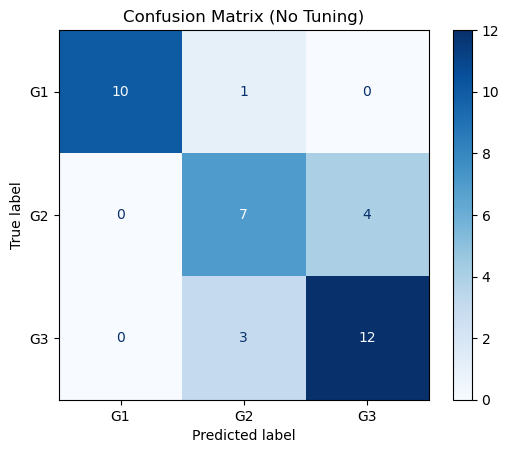


=== Classification Report (No Tuning) ===
              precision    recall  f1-score   support

          G1      1.000     0.909     0.952        11
          G2      0.636     0.636     0.636        11
          G3      0.750     0.800     0.774        15

    accuracy                          0.784        37
   macro avg      0.795     0.782     0.788        37
weighted avg      0.791     0.784     0.786        37


=== Tuning results ===
Best params: {'svc__C': 10, 'svc__gamma': 'scale'}
Best CV F1-macro=0.810

=== Final test with tuned hyperparams (SVC) ===
Accuracy=0.784
F1-macro=0.788
MCC=0.674


d:\conda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
d:\conda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
d:\conda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
d:\conda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
d:\conda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
d:\conda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
d:\conda\Lib\sit


=== Global LIME Ranking (avg abs weight) ===
1. GLCM_contrast > 10.94 => 0.0324
2. max_GLCM_contrast > 18.41 => 0.0315
3. cv_zernike_1 > 0.90 => 0.0312
4. min_zernike_20 > 0.00 => 0.0306
5. std_GLCM_contrast > 3.51 => 0.0300
6. max_GLCM_correlation <= 0.86 => 0.0276
7. cv_kurtosis_intensity <= 0.75 => 0.0256
8. cv_zernike_1 <= 0.76 => 0.0246
9. zernike_18 > 0.02 => 0.0236
10. min_zernike_7 > 0.00 => 0.0229
11. min_zernike_6 > 0.00 => 0.0209
12. mean_intensity > 103.59 => 0.0209
13. std_zernike_10 <= 0.02 => 0.0207
14. min_std_intensity > 16.92 => 0.0192
15. zernike_18 <= 0.02 => 0.0190


C:\Users\micha\AppData\Local\Temp\ipykernel_37880\520037800.py:159: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


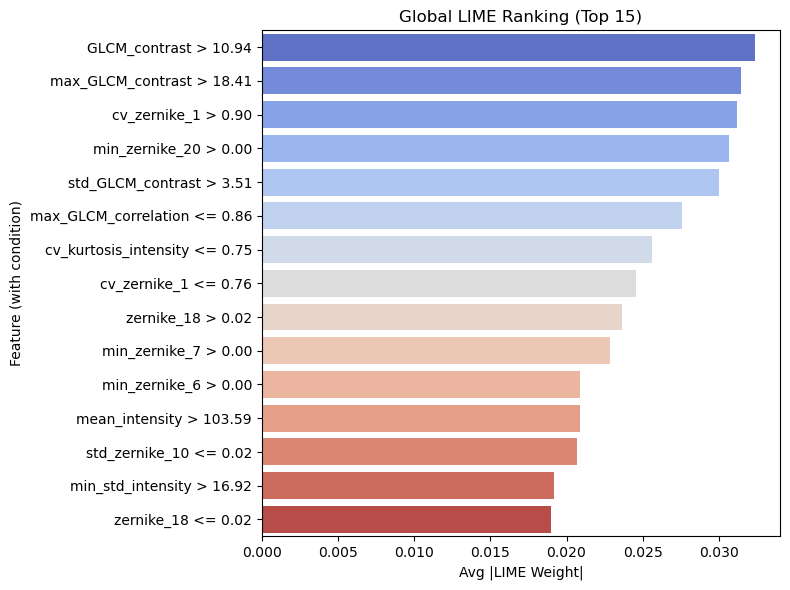


=== Summary of Metrics ===
             Method  Accuracy  F1_macro       MCC
0    CV (No Tuning)  0.797241  0.788862  0.705103
1  Test (No Tuning)  0.783784  0.787646  0.671136
2      Test (Tuned)  0.783784  0.787788  0.674037


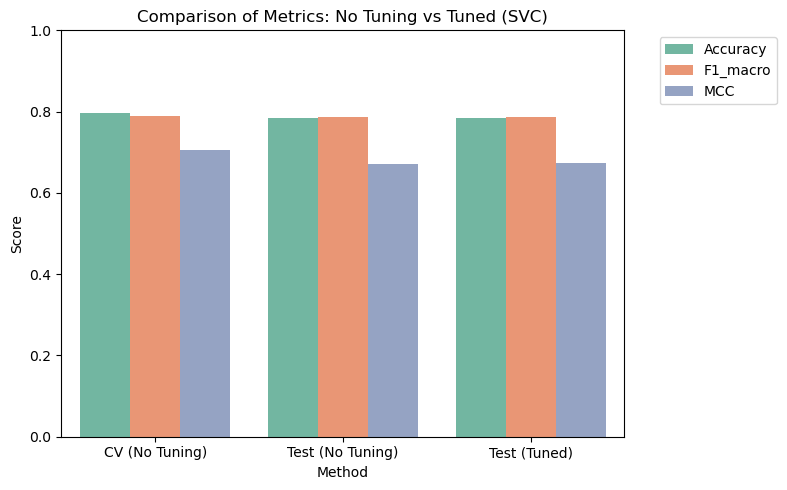

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.svm import SVC
from sklearn.model_selection import (
    train_test_split, StratifiedKFold, cross_validate, GridSearchCV
)
from sklearn.metrics import (
    accuracy_score, f1_score, matthews_corrcoef, make_scorer,
    confusion_matrix, classification_report, ConfusionMatrixDisplay
)
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# LIME
#!pip install lime
from lime.lime_tabular import LimeTabularExplainer
import collections

# ========== 1) Dane i podział ==========
X = data.drop(columns=["target"])
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ========== 2) Pipeline: StandardScaler + SVC(prob) ==========
svc_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel='rbf', probability=True, random_state=42))
])
svc_pipeline.fit(X_train, y_train)

# ========== 3) Cross-validation (bez tuningu) ==========
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
mcc_scorer = make_scorer(matthews_corrcoef)
scoring = {"accuracy":"accuracy", "f1_macro":"f1_macro", "mcc":mcc_scorer}

cv_scores = cross_validate(
    svc_pipeline, X_train, y_train, cv=cv,
    scoring=scoring, n_jobs=-1
)
acc_mean = np.mean(cv_scores["test_accuracy"])
f1_mean  = np.mean(cv_scores["test_f1_macro"])
mcc_mean = np.mean(cv_scores["test_mcc"])

print("\n=== CV results (SVC) ===")
print(f"Accuracy={acc_mean:.3f}, F1_macro={f1_mean:.3f}, MCC={mcc_mean:.3f}")

# ========== 4) Test set (bez tuningu) ==========
y_pred_test = svc_pipeline.predict(X_test)
test_acc = accuracy_score(y_test, y_pred_test)
test_f1 = f1_score(y_test, y_pred_test, average="macro")
test_mcc = matthews_corrcoef(y_test, y_pred_test)

print("\n=== Final test results (no tuning) ===")
print(f"Accuracy={test_acc:.3f}")
print(f"F1-macro={test_f1:.3f}")
print(f"MCC={test_mcc:.3f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(cm, display_labels=np.unique(y_test))
disp.plot(cmap="Blues")
plt.title("Confusion Matrix (No Tuning)")
plt.show()

# Classification Report
print("\n=== Classification Report (No Tuning) ===")
print(classification_report(y_test, y_pred_test, digits=3))

# ========== 5) Tuning hiperparam. ==========
param_grid = {
    "svc__C": [0.01, 0.1, 1, 10, 100],
    "svc__gamma": ["scale", 0.001, 0.01, 0.1, 1]
}
grid = GridSearchCV(
    svc_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring="f1_macro",
    n_jobs=-1
)
grid.fit(X_train, y_train)

print("\n=== Tuning results ===")
print("Best params:", grid.best_params_)
print(f"Best CV F1-macro={grid.best_score_:.3f}")

best_model = grid.best_estimator_
y_pred_test_tuned = best_model.predict(X_test)

test_acc_tuned = accuracy_score(y_test, y_pred_test_tuned)
test_f1_tuned  = f1_score(y_test, y_pred_test_tuned, average="macro")
test_mcc_tuned = matthews_corrcoef(y_test, y_pred_test_tuned)

print("\n=== Final test with tuned hyperparams (SVC) ===")
print(f"Accuracy={test_acc_tuned:.3f}")
print(f"F1-macro={test_f1_tuned:.3f}")
print(f"MCC={test_mcc_tuned:.3f}")

# ========== 6) LIME: global ranking ==========

# 1) Inicjujemy explainer
explainer_lime = LimeTabularExplainer(
    training_data = X_train.values,
    feature_names = X_train.columns.tolist(),
    class_names   = np.unique(y_train).astype(str).tolist(),
    discretize_continuous = True   # generuje "feature > 10.94" itp.
)

# 2) Definiujemy predict_proba
def predict_proba_func(X_2d):
    return best_model.predict_proba(X_2d)

# 3) Zbieramy wagi LIME
n_samples_for_global = 30
X_sub_global = X_test.sample(n_samples_for_global, random_state=123)

feature_weights = collections.defaultdict(float)
count_feature   = collections.defaultdict(int)

for i, (idx, row) in enumerate(X_sub_global.iterrows()):
    x_row = row.values
    exp = explainer_lime.explain_instance(
        data_row = x_row,
        predict_fn = predict_proba_func,
        num_features = X_train.shape[1],
        top_labels = 1
    )
    label_expl = exp.available_labels()[0]
    exp_map = exp.as_list(label=label_expl)
    # Zbieramy sumaryczne wagi
    for (feat_name, w) in exp_map:
        feature_weights[feat_name] += abs(w)
        count_feature[feat_name]   += 1

# 4) Średnia waga
global_lime_ranking = []
for feat_name, total_w in feature_weights.items():
    avg_w = total_w / count_feature[feat_name]
    global_lime_ranking.append((feat_name, avg_w))

# 5) Sort malejąco
global_lime_ranking.sort(key=lambda x: x[1], reverse=True)

print("\n=== Global LIME Ranking (avg abs weight) ===")
for i, (fn, val) in enumerate(global_lime_ranking[:15], start=1):
    print(f"{i}. {fn} => {val:.4f}")

# 6) Barplot rankingu
ranking_df = pd.DataFrame(global_lime_ranking, columns=["FeatureCondition", "AvgAbsWeight"])
top_15 = ranking_df.head(15)

plt.figure(figsize=(8, 6))
sns.barplot(
    data=top_15, 
    x="AvgAbsWeight", 
    y="FeatureCondition", 
    orient="h", 
    palette="coolwarm"
)
plt.xlabel("Avg |LIME Weight|")
plt.ylabel("Feature (with condition)")
plt.title("Global LIME Ranking (Top 15)")
plt.tight_layout()
plt.show()

# ========== 7) Zbiorcze metryki ==========

metrics_df = pd.DataFrame({
    "Method": ["CV (No Tuning)", "Test (No Tuning)", "Test (Tuned)"],
    "Accuracy": [acc_mean, test_acc, test_acc_tuned],
    "F1_macro": [f1_mean, test_f1, test_f1_tuned],
    "MCC": [mcc_mean, test_mcc, test_mcc_tuned]
})
print("\n=== Summary of Metrics ===")
print(metrics_df)

df_plot = metrics_df.melt(id_vars="Method", var_name="Metric", value_name="Score")
plt.figure(figsize=(8,5))
sns.barplot(data=df_plot, x="Method", y="Score", hue="Metric", palette="Set2")
plt.ylim(0,1)
plt.title("Comparison of Metrics: No Tuning vs Tuned (SVC)")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.tight_layout()
plt.show()


In [11]:
def parse_feature_name(lime_feat_name):
    """
    Jeśli mamy 'GLCM_contrast > 10.94', 
    zwracamy 'GLCM_contrast'.
    Zakład: nazwa cechy to część do pierwszego spacji 
    (gdy discretize_continuous=True).
    Inaczej możesz splitować po '>' czy '<=' itd.
    """
    # Rozdziel po spacji
    parts = lime_feat_name.split(" ")
    return parts[0]  # to jest nazwa kolumny, np. 'GLCM_contrast'




Selected columns from LIME ranking: ['GLCM_contrast', 'max_GLCM_contrast', 'cv_zernike_1', 'min_zernike_20', 'std_GLCM_contrast', 'max_GLCM_correlation', 'cv_kurtosis_intensity', 'zernike_18', 'min_zernike_7', 'min_zernike_6', 'mean_intensity', 'std_zernike_10', 'min_std_intensity', 'min_zernike_23', 'min_GLCM_correlation', 'max_zernike_1', 'std_intensity', 'min_zernike_5', 'max_mean_intensity', 'max_zernike_10', 'min_kurtosis_intensity', 'zernike_16', 'min_zernike_13', 'min_zernike_14', 'max_bounding_box_height', 'max_region_id', 'zernike_5', 'max_std_intensity', 'max_zernike_2', 'cv_zernike_5', 'std_region_id', 'min_zernike_16', 'min_zernike_22', 'zernike_2', 'max_entropy_hist', 'std_zernike_11']


In [13]:
top_n = 45
parsed_ranking = []
for (fn, val) in global_lime_ranking[:top_n]:
    colname = parse_feature_name(fn)
    parsed_ranking.append( (colname, val) )

# Teraz w parsed_ranking mamy (colname, avg_weight).
# Ale niektóre cechy moga się powtarzać (np. 'zernike_6 <= 0.02' i 'zernike_6 > 0.00') 
# => unikalna nazwa
unique_col_scores = {}
for (col, w) in parsed_ranking:
    if col not in unique_col_scores:
        unique_col_scores[col] = w
    else:
        # Ewentualnie sumować/średnia 
        unique_col_scores[col] = max(unique_col_scores[col], w)

selected_cols = list(unique_col_scores.keys())

print("\nSelected columns from LIME ranking:", selected_cols)

X_train_sel = X_train[selected_cols]
X_test_sel  = X_test[selected_cols]

svc_pipeline_sel = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel='rbf', probability=True, random_state=42))
])

# Cross-validate
cv_scores_sel = cross_validate(
    svc_pipeline_sel, X_train_sel, y_train,
    cv=cv, scoring=scoring, n_jobs=-1
)
acc_sel_mean = np.mean(cv_scores_sel["test_accuracy"])
f1_sel_mean  = np.mean(cv_scores_sel["test_f1_macro"])
mcc_sel_mean = np.mean(cv_scores_sel["test_mcc"])

print(f"\n=== CV (LIME selected {len(selected_cols)} features) ===")
print(f"Acc={acc_sel_mean:.3f}, F1_macro={f1_sel_mean:.3f}, MCC={mcc_sel_mean:.3f}")

# Test
svc_pipeline_sel.fit(X_train_sel, y_train)
y_pred_sel = svc_pipeline_sel.predict(X_test_sel)

test_acc_sel = accuracy_score(y_test, y_pred_sel)
test_f1_sel  = f1_score(y_test, y_pred_sel, average="macro")
test_mcc_sel = matthews_corrcoef(y_test, y_pred_sel)

print("\n=== Test with LIME-selected columns (no tuning) ===")
print(f"Accuracy={test_acc_sel:.3f}")
print(f"F1-macro={test_f1_sel:.3f}")
print(f"MCC={test_mcc_sel:.3f}")

# Ewentualnie tuning
grid_sel = GridSearchCV(
    svc_pipeline_sel,
    param_grid=param_grid,  # ten sam co wyżej
    cv=cv,
    scoring="f1_macro",
    n_jobs=-1
)
grid_sel.fit(X_train_sel, y_train)

best_model_sel = grid_sel.best_estimator_
y_pred_sel_tuned = best_model_sel.predict(X_test_sel)

test_acc_sel_tuned = accuracy_score(y_test, y_pred_sel_tuned)
test_f1_sel_tuned  = f1_score(y_test, y_pred_sel_tuned, average="macro")
test_mcc_sel_tuned = matthews_corrcoef(y_test, y_pred_sel_tuned)

print("\n=== Test with LIME-selected columns (TUNED) ===")
print(f"Accuracy={test_acc_sel_tuned:.3f}")
print(f"F1-macro={test_f1_sel_tuned:.3f}")
print(f"MCC={test_mcc_sel_tuned:.3f}")



Selected columns from LIME ranking: ['GLCM_contrast', 'max_GLCM_contrast', 'cv_zernike_1', 'min_zernike_20', 'std_GLCM_contrast', 'max_GLCM_correlation', 'cv_kurtosis_intensity', 'zernike_18', 'min_zernike_7', 'min_zernike_6', 'mean_intensity', 'std_zernike_10', 'min_std_intensity', 'min_zernike_23', 'min_GLCM_correlation', 'max_zernike_1', 'std_intensity', 'min_zernike_5', 'max_mean_intensity', 'max_zernike_10', 'min_kurtosis_intensity', 'zernike_16', 'min_zernike_13', 'min_zernike_14', 'max_bounding_box_height', 'max_region_id', 'zernike_5', 'max_std_intensity', 'max_zernike_2', 'cv_zernike_5', 'std_region_id', 'min_zernike_16', 'min_zernike_22', 'zernike_2', 'max_entropy_hist', 'std_zernike_11']

=== CV (LIME selected 36 features) ===
Acc=0.818, F1_macro=0.818, MCC=0.727

=== Test with LIME-selected columns (no tuning) ===
Accuracy=0.811
F1-macro=0.811
MCC=0.715

=== Test with LIME-selected columns (TUNED) ===
Accuracy=0.811
F1-macro=0.805
MCC=0.712
